In [2]:
import pandas as pd, numpy as np, seaborn as sns

In [3]:
df=pd.read_csv('/content/AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


**Data Understanding**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Data Cleaning**

In [7]:
# Identifying & removing data where minimum nights is greater than avaialability in the property
df[df['minimum_nights']>df['availability_365']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,28-12-2011,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48753,36418759,"Spacious Room w/ AC, Laundry, WiFi + Free Clea...",154980356,Joanne & Robert,Brooklyn,Bedford-Stuyvesant,40.68600,-73.93000,Private room,32,30,0,NaN,NaN,1,10
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [8]:
df=df[df['minimum_nights']<df['availability_365']]

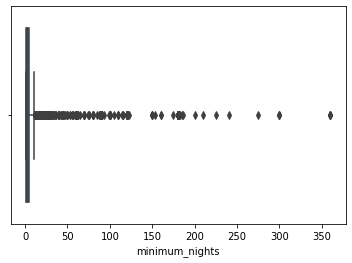

In [9]:
# Identifying & removing data where minimum nights is greater than 365 
sns.boxplot(data=df,x='minimum_nights')

In [10]:
df[df['minimum_nights']>365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [11]:
df=df[df['minimum_nights']<366]

In [12]:
df.shape

(30179, 16)

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.017900e+04,3.017900e+04,30179.00000,30179.000000,30179.000000,30179.000000,30179.000000,25145.000000,30179.000000,30179.000000
mean,2.101609e+07,8.249813e+07,40.72827,-73.948367,162.598429,7.483548,32.356341,1.838111,10.543822,182.082640
std,1.151541e+07,8.716336e+07,0.05671,0.051900,251.932367,14.324555,52.078331,1.817892,41.186189,124.035313
min,2.539000e+03,2.571000e+03,40.49979,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,2.000000
25%,1.165912e+07,8.814258e+06,40.68816,-73.983205,70.000000,1.000000,2.000000,0.470000,1.000000,65.000000
50%,2.256949e+07,4.242101e+07,40.72365,-73.953930,111.000000,2.000000,10.000000,1.270000,1.000000,176.000000
75%,3.128187e+07,1.477160e+08,40.76303,-73.929660,189.000000,5.000000,40.000000,2.730000,3.000000,309.000000
max,3.648724e+07,2.743213e+08,40.91306,-73.712990,10000.000000,360.000000,629.000000,58.500000,327.000000,365.000000


Identifying Missing Values

In [14]:
df.isnull().sum() / len(df)*100

id                                 0.000000
name                               0.009941
host_id                            0.000000
host_name                          0.026508
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       16.680473
reviews_per_month                 16.680473
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

**Data Analysis**

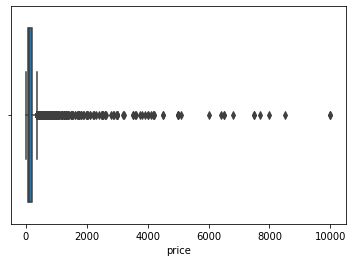

In [15]:
import seaborn as sns

sns.boxplot(data=df,x='price')

Price Binning

In [16]:
bins = [0, 100, 200, 10000]
labels = ['Low', 'Medium', 'High']
df['price_range'] = pd.cut(x = df['price'], bins = bins, labels = labels, include_lowest = True)

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,Medium
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Medium
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Low
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,Medium


In [18]:
df['price_range'].value_counts(normalize=True)

Low       0.469631
Medium    0.332019
High      0.198350
Name: price_range, dtype: float64

Type of hosts to acquire more

In [19]:
filter = (df['room_type']=='Entire home/apt') & (df['availability_365']==365) & (df['price_range']== 'Low')
df1=df.loc[filter]

In [20]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
349,94209,LARGE 1BR (CONV 2BR) CROWN HEIGHTS,503800,Sadatu,Brooklyn,Crown Heights,40.67473,-73.94494,Entire home/apt,100,90,0,NaN,NaN,1,365,Low
1136,482365,GREAT BRAND NEW 1 BED APT*TIMES SQ,914838,Lior,Manhattan,Hell's Kitchen,40.75636,-73.99390,Entire home/apt,80,30,32,31-01-2017,0.37,7,365,Low
1458,652691,COLUMBUS CIRCLE~100% FURNISHED W.58,1475015,Mike,Manhattan,Upper West Side,40.76934,-73.98464,Entire home/apt,95,30,1,01-11-2012,0.01,52,365,Low
1606,728764,AMAZING COLUMBUS CIRCLE LOCATION :),1475015,Mike,Manhattan,Hell's Kitchen,40.76761,-73.98619,Entire home/apt,100,30,3,01-11-2018,0.12,52,365,Low
2023,895368,Large 2 bedroom apt in Manhattan,4770121,Somaya,Manhattan,Harlem,40.82434,-73.93957,Entire home/apt,100,180,0,NaN,NaN,4,365,Low


In [21]:
df1.shape

(37, 17)

In [22]:
df1.host_name.value_counts()

Mike          13
Alex           2
Nissim         2
Lior           2
Sadatu         1
Rose           1
Wayne          1
Majidudeen     1
Nyota          1
Mandela        1
Marilyn        1
Nepreil        1
Fabe           1
Sotira         1
Noemi          1
John           1
Shamara        1
Nancy          1
Chris          1
Lorna          1
Somaya         1
Michael        1
Name: host_name, dtype: int64

**Insight 1 : More properties of hosts like Mike, Alex, Nissim, Lior, Saddatu, Rose etc to be acquired more which has Low price range, 365 days availability and renting entire home**

In [23]:
df.neighbourhood.value_counts()

Bedford-Stuyvesant    2409
Williamsburg          1943
Harlem                1665
Hell's Kitchen        1400
Bushwick              1390
                      ... 
Rossville                1
Fort Wadsworth           1
Willowbrook              1
Silver Lake              1
Richmondtown             1
Name: neighbourhood, Length: 218, dtype: int64

In [24]:
df.neighbourhood_group.value_counts()

Manhattan        12986
Brooklyn         11765
Queens            4196
Bronx              902
Staten Island      330
Name: neighbourhood_group, dtype: int64

**Insight 2: More properties need to be acquired in neighbourhood of Staten Island, Bronx and Queens which has low properties in comparison to Manhattan and Brooklyn**

In [25]:
df.price_range.value_counts()

Low       14173
Medium    10020
High       5986
Name: price_range, dtype: int64

**Insight 3: Price range less than 200 per night is preferred by most of the customers**

In [26]:
df.sort_values(by=['reviews_per_month'], ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,07-07-2019,58.50,9,299,Low
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,07-07-2019,27.95,9,299,Medium
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,08-07-2019,20.94,1,134,Low
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,06-07-2019,19.75,3,26,Low
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,08-07-2019,17.82,3,25,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,Low


In [27]:
df['room_type'].value_counts()

Entire home/apt    15755
Private room       13573
Shared room          851
Name: room_type, dtype: int64

**Insight 4: Different kind of properties available are 'Entire home/apt', 'Private Room' & 'Shared Room'**

In [28]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,Medium
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Medium
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Low
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,Medium


**Insight 5: Adjustments in the existing properties to make it more customer oriented are -** 
1) Lower down the price range to a previous bracket for e.g. from High to Medium or from medium to low
2) Increase the availability of the property by talking to its host so that business is not impacted just because the property is not available

In [29]:
df.sort_values(by=['number_of_reviews'], ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,05-07-2019,14.58,2,333,Low
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,21-06-2019,7.75,3,293,Low
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,23-06-2019,7.72,3,342,Low
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,15-06-2019,7.57,3,339,Low
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,27-06-2019,13.40,2,173,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41715,32438036,Sunny 3 Story 5BR 5Bath Townhouse Upper East S...,243655782,Pam And Ray,Manhattan,Upper East Side,40.77534,-73.95287,Private room,1250,5,0,NaN,NaN,1,116,High
41711,32428466,Top floor apt in luxury building - lease takeover,39427266,Alison,Queens,Rego Park,40.73288,-73.86438,Entire home/apt,108,210,0,NaN,NaN,1,270,Medium
41709,32427478,Brooklyn home,243556325,Sa,Brooklyn,Bensonhurst,40.61268,-73.98857,Entire home/apt,100,30,0,NaN,NaN,1,312,Low
41706,32426480,Spread Love it's the Brooklyn Way,40846857,Kaylin,Brooklyn,Crown Heights,40.67241,-73.95041,Private room,70,2,0,NaN,NaN,2,66,Low


**Insight 6: 'Room near JFK Queen Bed','Great Bedroom in Manhattan','Beautiful Bedroom in Manhattan','Private Bedroom in Manhattan' are some of the most popular properties in Newyork**

In [30]:
df.sort_values(by=['calculated_host_listings_count'], ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range
44533,34284408,Sonder | 116 John | Spacious 1BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70685,-74.00698,Entire home/apt,130,29,0,NaN,NaN,327,246,Medium
44603,34317924,Sonder | The Biltmore | Bright 1BR + Workspace,219517861,Sonder (NYC),Manhattan,Theater District,40.76118,-73.98628,Entire home/apt,154,29,0,NaN,NaN,327,343,Medium
47821,35937891,Sonder | 116 John | Simple Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70707,-74.00557,Entire home/apt,699,29,0,NaN,NaN,327,341,High
44592,34315235,Pleasant 1BR in Midtown East by Sonder,219517861,Sonder (NYC),Manhattan,Midtown,40.75572,-73.98331,Entire home/apt,217,29,0,NaN,NaN,327,343,High
43233,33528090,Sonder | 21 Chelsea | Vibrant 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Chelsea,40.74250,-73.99443,Entire home/apt,260,29,0,NaN,NaN,327,365,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24539,19734492,Beautiful Modern Brooklyn Gem,137184002,Kevin,Brooklyn,East Flatbush,40.65430,-73.91488,Entire home/apt,85,1,183,08-07-2019,7.65,1,120,Low
24533,19730968,Furnished private large room at a great location,138717905,Luca,Manhattan,East Harlem,40.79626,-73.94429,Private room,67,2,28,03-07-2019,1.22,1,179,Low
24527,19721535,Rockaway Beach Oasis,12162815,Annelise,Queens,Rockaway Beach,40.59093,-73.81238,Entire home/apt,140,2,9,14-06-2019,0.38,1,36,Medium
24524,19720877,"Bright 2BR, terrace, best Bklyn Heights location!",7627586,Sarah,Brooklyn,Brooklyn Heights,40.69387,-73.99412,Entire home/apt,299,4,6,31-12-2018,0.27,1,27,High


In [31]:
df2 = df[['calculated_host_listings_count','host_name']]

In [32]:
df2.head()

,calculated_host_listings_count,host_name
0,6,John
1,2,Jennifer
2,1,Elisabeth
3,1,LisaRoxanne
5,1,Chris


In [33]:
df2=df2.sort_values(by=['calculated_host_listings_count'], ascending=False)

In [34]:
df2.head()

,calculated_host_listings_count,host_name
44533,327,Sonder (NYC)
44603,327,Sonder (NYC)
47821,327,Sonder (NYC)
44592,327,Sonder (NYC)
43233,327,Sonder (NYC)


In [35]:
print(pd.unique(df['calculated_host_listings_count']))

[  6   2   1   4   3   5   7  13  28   8  11   9  52  18  15  19  10  39
  26  29  12  21  96  14  34  43 121  37  49  31  91  16  87  33  23  50
  20  25 232  17  47 103  65  30  27 327  32]


In [36]:
df2.groupby('host_name')['calculated_host_listings_count'].unique()

host_name
#NAME?                         [1]
'Cil                           [1]
(Ari) HENRY LEE                [1]
(Email hidden by Airbnb)    [2, 1]
(Mary) Haiy                    [1]
                             ...  
铀 Yuli                         [3]
青明                             [5]
韦达                             [1]
소정                             [1]
현선                             [1]
Name: calculated_host_listings_count, Length: 7971, dtype: object

In [37]:
filt = df['calculated_host_listings_count']==232
df.loc[filt,'host_name']

26137    Blueground
29128    Blueground
30158    Blueground
30428    Blueground
31506    Blueground
            ...    
48723    Blueground
48724    Blueground
48725    Blueground
48726    Blueground
48727    Blueground
Name: host_name, Length: 220, dtype: object

In [38]:
filt = df['calculated_host_listings_count']==121
df.loc[filt,'host_name']

9740     Kara
10075    Kara
10335    Kara
10398    Kara
10490    Kara
         ... 
42128    Kara
42129    Kara
42130    Kara
48529    Kara
48530    Kara
Name: host_name, Length: 121, dtype: object

**Insight 7: Sonder(NYC), Blueground & Kara are the top three host with maximum property listings.**

**Data Visualization**

Classification of variables into different types

In [39]:
cat_variables = df[['room_type','neighbourhood_group','neighbourhood']]

In [40]:
cont_variables = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [41]:
loc_variables = df[['latitude','longitude']]

In [42]:
time_variables = df['last_review']

Visualization of Room Type Vs Price

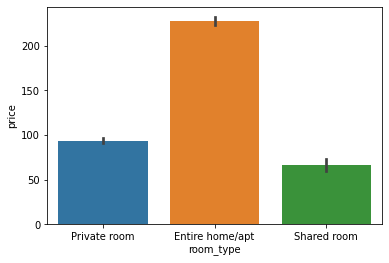

In [43]:
sns.barplot(data=df, x='room_type', y='price')

**Above chart depicts that Shared Room is cheapest and Entire Room/Apt is costliest**

Visualization of Neighbourhood Group Vs Price

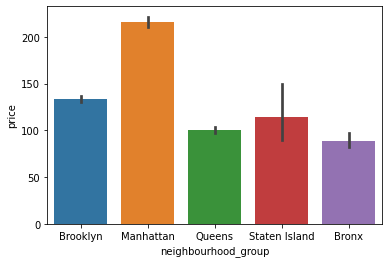

In [44]:
sns.barplot(data=df, x='neighbourhood_group', y='price')

**Above Chart depcits that Properties in Bronx neighbourhood is cheapest and Costliest in Manhattan**

Visualization of NeighbourHood Group Vs Price Range

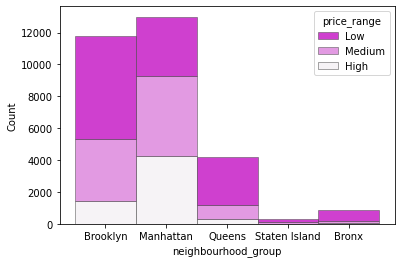

In [45]:
sns.histplot(data=df, x='neighbourhood_group', hue='price_range', multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5)

**Staten_Island & Bronx don't have any Medium Range properties**

Binning Availability

In [46]:
bins = [0, 100, 250, 365]
labels = ['Low', 'Medium', 'High']
df['availability_range'] = pd.cut(x = df['availability_365'], bins = bins, labels = labels, include_lowest = True)

In [47]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range,availability_range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,Medium,High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,High,High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Medium,High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Low,Medium
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129,Medium,Medium


Visualization of Properties Availability in Each Area

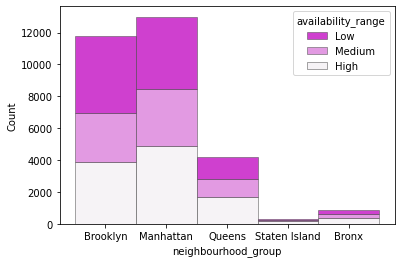

In [48]:
sns.histplot(data=df, x='neighbourhood_group', hue='availability_range', multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5)

In [49]:
df['availability_range'].value_counts(normalize=True)

Low       0.367573
High      0.363166
Medium    0.269260
Name: availability_range, dtype: float64

**Above chart & data depicts that only 36% of the properties are in High availability range, rest are in Medium or Low availability range**

Visualization of number of reviews (demand) vs price

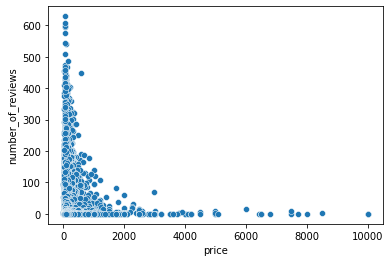

In [50]:
sns.scatterplot(data=df,x='price',y='number_of_reviews')

**Above chart depicts that as price increases demand of property decreases**

Visualization of number of properties in a Neighbourhood group

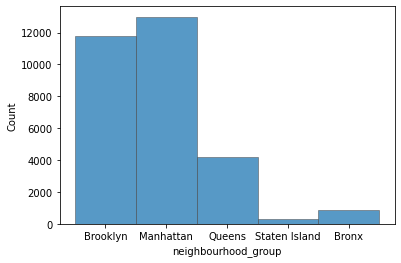

In [52]:
sns.histplot(data=df, x='neighbourhood_group',
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5)